# 2006-CSDA-Automatic dimensionality selection from the scree plot via the use of profile likelihood

For any given $q$, MLEs of $\theta_1$ and $\theta_2$ can be obtained separately from $\mathcal{y}_1$ and $\mathcal{y}_2$. By plugging in these estimates into (1), we obtain a profile log-likehood for q:
$$
l_q(q) = \sum_{i=1}^q \log f(d_i; \hat{ \theta_1 }(q) ) + \sum_{j=q+1}^p \log f(d_j; \hat{ \theta_2 }(q) )
$$

For simplicity, we choose $f$ to be the Gaussian distribution:
$$
f(d; \mu_j; \sigma^2) = \frac{1}{ \sqrt{2 \pi \sigma^2} } \exp \left\{ - \frac{ (d - \mu_j)^2 }{ 2 \sigma^2 } \right\} \quad \text{for} \, j = 1,2
$$

So,

$$
\begin{align}
  f(d; \mu_j; \sigma^2) &= \frac{1}{ \sqrt{2 \pi \sigma^2} } \exp \left\{ - \frac{ (d - \mu_j)^2 }{ 2 \sigma^2 } \right\} \\
  \log f(d; \mu_j; \sigma^2) &= \log \left( \frac{1}{ \sqrt{2 \pi \sigma^2} } \exp \left\{ - \frac{ (d - \mu_j)^2 }{ 2 \sigma^2 } \right\} \right) \\
                           &= \log \left( \frac{1}{ \sqrt{2 \pi \sigma^2} } \right) + \log \left( \exp \left\{ - \frac{ (d - \mu_j)^2 }{ 2\sigma^2 } \right\} \right) \\
                           &= \log 1 - \log \left( \sqrt{ 2 \pi \sigma^2 } \right) + \left( - \frac{ (d - \mu_j)^2 }{ 2 \sigma^2 } \right) \\
                           &= 0 - \frac{1}{2} \log \left( 2 \pi \sigma^2 \right) - \frac{ (d - \mu_j)^2 }{ 2 \sigma^2 } \\
                           &= - \frac{ (d - \mu_j)^2 }{ 2 \sigma^2 } - \frac{1}{2} \log \left( 2 \pi \sigma^2 \right)
\end{align}
$$

So,

$$
\begin{align}
l_q(q) &= \sum_{i=1}^q \log f( d_i; \hat{ \theta_1 }(q) ) + \sum_{j=q+1}^p \log f( d_j; \hat{ \theta_2 }(q) ) \\
       &= \sum_{i=1}^q \left( - \frac{ ( d_i - \hat{\mu}_1 )^2 }{ 2 \sigma^2 } - \frac{1}{2} \log \left( 2 \pi \sigma^2 \right) \right) + \sum_{j=q+1}^p \left( - \frac{ ( d_j - \hat{\mu}_2 )^2 }{ 2 \sigma^2 } - \frac{1}{2} \log \left( 2 \pi \sigma^2 \right) \right) \\
       &= - \sum_{i=1}^q \frac{ ( d_i - \hat{\mu}_1 )^2 }{ 2 \sigma^2 } - \sum_{j=q+1}^p \frac{ ( d_j - \hat{\mu}_2 )^2 }{ 2 \sigma^2 } - \frac{q}{2} \log \left( 2 \pi \sigma^2 \right) - \frac{p - q}{2} \log \left( 2 \pi \sigma^2 \right) \\
       &= - \sum_{i=1}^q \frac{ ( d_i - \hat{\mu}_1 )^2 }{ 2 \sigma^2 } - \sum_{j=q+1}^p \frac{ ( d_j - \hat{\mu}_2 )^2 }{ 2 \sigma^2 } - \frac{p}{2} \log \left( 2 \pi \sigma^2 \right) \\
       &= - \frac{1}{2 \sigma^2} \left( \sum_{i=1}^q (d_i - \hat{\mu}_i)^2 + \sum_{j=q+1}^p (d_j - \hat{\mu}_2)^2 \right) - \frac{p}{2} \log \left( 2 \pi \sigma^2 \right) \\
\end{align}
$$

Reference:

[1]M. Zhu and A. Ghodsi, “Automatic dimensionality selection from the scree plot via the use of profile likelihood,” Computational Statistics & Data Analysis, vol. 51, no. 2, pp. 918–930, 2006, doi: https://doi.org/10.1016/j.csda.2005.09.010.
  

,Variance
Feature,
Feature1,0.75
Feature2,0.75
Feature3,75221.61
Feature4,75221.61


eigenvalues: [0.61, 0.39, 0.0, 0.0]
Optimal number of PCA components: 2


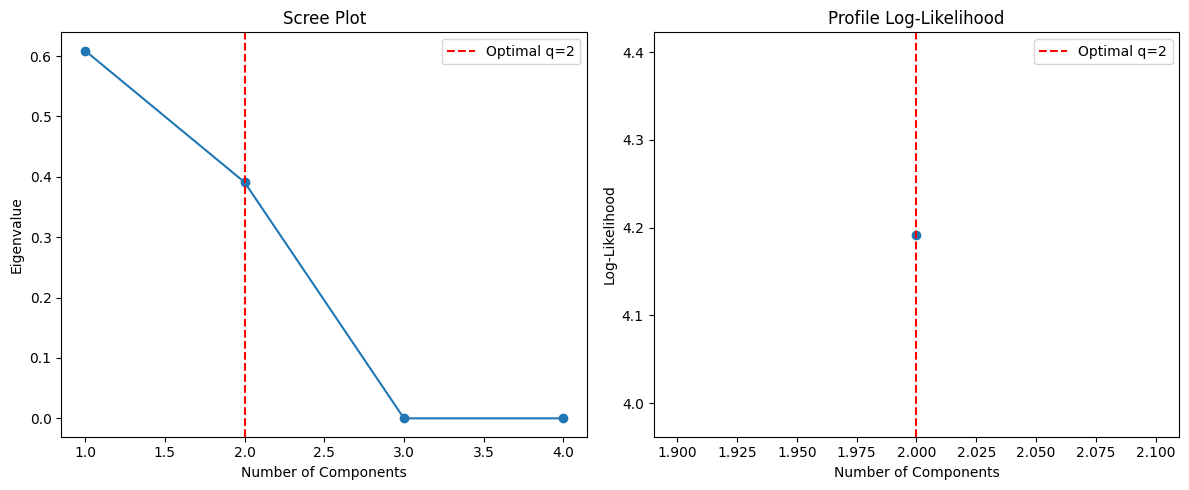

In [1]:
import numpy as np

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

def find_hat_q(eigenvalues: np.ndarray):
  p = len(eigenvalues)

  log_likelihoods = np.zeros(p - 1)

  # Given a fixed number $1 \leq q \leq p$, 
  # write $\mathcal{y}_1 = {d_1, d_2, ..., d_q}$ and 
  # $\mathcal{y}_2 = {d_{q+1}, d_{q+2}, ..., d_p}$
  for q in range(1, p):

    # Note here that it is important to use a common scale parameter $\sigma$
    # for both $\mathcal{y}_1$ and $\mathcal{y}_2$.
    # If a different $\sigma$ is used for each model,
    # the model becomes too flexible and 
    # it is possible for the profile log-likelihood (2) to become infinite
    # e.g., when q = 1 and q = p - 1.
    if (q == 1) or (q == p - 1):
      log_likelihoods[q - 1] = -np.inf
      continue

    S_1 = eigenvalues[:q] # $\mathscr{S}$
    S_2 = eigenvalues[q:]

    # MLE for the common scale parameter $\sigma^2$ is the usual pooled estimate,
    # $\sigma^2 = \frac{ (q - 1) s_1^2 + (p - q - 1) s_2^2 }{ p - 2 }$
    # where s_j^2 is the sample variance of $\mathcal{y}_j$
    s_1_squared = np.var(S_1, ddof=1)
    s_2_squared = np.var(S_2, ddof=1)
    sigma_squared = ( (q - 1) * s_1_squared + (p - q - 1) * s_2_squared ) / (p - 2)

    # For any given $q$, MLEs of $\theta_1$ and $\theta_2$
    # can be obtained separately from $\mathcal{y}_1$ and $\mathcal{y}_2$.
    # By plugging in these estimates into (1), we obtain a profile log-likehood for q:
    # $l_q(q) = \sum_{i=1}^q \log f(d_i; \hat{ \theta_1 }(q) ) + \sum_{j=q+1}^p \log f(d_j; \hat{ \theta_2 }(q) )$
    # 
    # For simplicity, we choose $f$ to be the Gaussian distribution:
    # $f(d; \mu_j; \sigma^2) = \frac{1}{ \sqrt{2 \pi \sigma^2} } \exp \left\{ - \frac{ (d - \mu_j)^2 }{ 2 \sigma^2 } \right\} \quad \text{for} \, j = 1,2$
    mu_1 = np.mean(S_1)
    mu_2 = np.mean(S_2)
    log_likelihood = (- 1 / (2 * sigma_squared) * (np.sum((S_1 - mu_1) ** 2)
                                                   + np.sum((S_2 - mu_2) ** 2))
                     - (p / 2) * np.log(2 * np.pi * sigma_squared))
    
    log_likelihoods[q - 1] = log_likelihood

  # An estimate of q can the be obtained by maximizing the profile log-likelihood above.
  # To do so, a simple exhaustive search can be used, at least conceptually.
  # That is, we simply compute l_q(1), l_q(2), ..., l_q(p) and estiamte q with
  # $\underset{k=1,2,...,p}{\operatorname{argmax}} \, l_q(k)$
  hat_q = np.argmax(log_likelihoods) + 1 # +1 to account for 0-based indexing
  return hat_q, log_likelihoods

# Expected optimal number of components are 2
feature1 = np.array([1, 2, 3,   1, 2, 3,    1, 2, 3])
feature2 = feature1 + 1
feature3 = np.array([1, 4, 9,   16, 25, 36,  343, 512, 729])
feature4 = feature3 + 1
X = pd.DataFrame({'Feature1': feature1,
                  'Feature2': feature2,
                  'Feature3': feature3,
                  'Feature4': feature4
})
display(pd.DataFrame(X.var().apply(lambda x: round(x, 2)), columns=['Variance']).rename_axis('Feature'))

# Standardize the data to have a mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform CPA
pca = PCA()
pca.fit(X_scaled)
eigenvalues = pca.explained_variance_ratio_
print("eigenvalues: %s" % ([round(x, 2) for x in eigenvalues]))

# Example eigenvalues based on the paper
# np.random.seed(0)
# eigenvalues = np.sort(np.concatenate([
#     np.random.uniform(0, 45, 50),
#     np.random.uniform(55, 100, 50)
# ]))[::-1]

# Example eigenvalues based on the paper
# np.random.seed(0)
# eigenvalues = np.sort(np.concatenate([
#     np.random.uniform(0, 49, 80),
#     np.random.uniform(51, 100, 20)
# ]))[::-1]

# Example eigenvalues
# np.random.seed(0)
# eigenvalues = [1.0, 0.9, 0.8, 0.4, 0.3, 0.2, 0.1]

# Determine optimal number of components
hat_q, log_likelihoods = find_hat_q(eigenvalues)

# Plot Scree plot and Profile Log-Likelihood
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scree Plot
axes[0].plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
axes[0].set_title("Scree Plot")
axes[0].set_xlabel("Number of Components")
axes[0].set_ylabel("Eigenvalue")
axes[0].axvline(hat_q, color='r', linestyle='--', label=f'Optimal q={hat_q}')
axes[0].legend()

# Profile Log-Likelihood Plot
axes[1].plot(range(1, len(log_likelihoods) + 1), log_likelihoods, marker='o', linestyle='-')
axes[1].set_title("Profile Log-Likelihood")
axes[1].set_xlabel("Number of Components")
axes[1].set_ylabel("Log-Likelihood")
axes[1].axvline(hat_q, color='r', linestyle='--', label=f'Optimal q={hat_q}')
axes[1].legend()

plt.tight_layout()

print(f"Optimal number of PCA components: {hat_q}")